In [2]:
!pip install --upgrade llvmlite
!pip install --upgrade numba==0.53.1
!pip install --upgrade librosa

ERROR: Ignored the following versions that require a different python version: 0.52.0 Requires-Python >=3.6,<3.9; 0.52.0rc3 Requires-Python >=3.6,<3.9; 0.53.0 Requires-Python >=3.6,<3.10; 0.53.0rc1.post1 Requires-Python >=3.6,<3.10; 0.53.0rc2 Requires-Python >=3.6,<3.10; 0.53.0rc3 Requires-Python >=3.6,<3.10; 0.53.1 Requires-Python >=3.6,<3.10; 0.54.0 Requires-Python >=3.7,<3.10; 0.54.0rc2 Requires-Python >=3.7,<3.10; 0.54.0rc3 Requires-Python >=3.7,<3.10; 0.54.1 Requires-Python >=3.7,<3.10
ERROR: Could not find a version that satisfies the requirement numba==0.53.1 (from versions: 0.1, 0.2, 0.3, 0.5.0, 0.6.0, 0.7.0, 0.7.1, 0.7.2, 0.8.0, 0.8.1, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.12.2, 0.13.0, 0.13.2, 0.13.3, 0.13.4, 0.14.0, 0.15.1, 0.16.0, 0.17.0, 0.18.1, 0.18.2, 0.19.1, 0.19.2, 0.20.0, 0.21.0, 0.22.0, 0.22.1, 0.23.0, 0.23.1, 0.24.0, 0.25.0, 0.26.0, 0.27.0, 0.28.1, 0.29.0, 0.30.0, 0.30.1, 0.31.0, 0.32.0, 0.33.0, 0.34.0, 0.35.0, 0.36.1, 0.36.2, 0.37.0, 0.38.0, 0.38.1, 0.39

In [1]:
import librosa
import librosa.display
import numpy as np
import pandas as pd

import IPython.display as ipd
from IPython.display import Image


#%pylab inline
#%matplotlib inline
import matplotlib.pyplot as plt

import os

In [2]:
audio = '/emodb/wav/13a02Wa.wav'

In [3]:
data, sampling_rate = librosa.load('emodb/wav/13a02Wa.wav')

In [4]:
data[0]

5.39299e-05

In [5]:
ipd.Audio('emodb/wav/13a02Wa.wav')

In [6]:
sampling_rate

22050

In [7]:
len(data)

36802

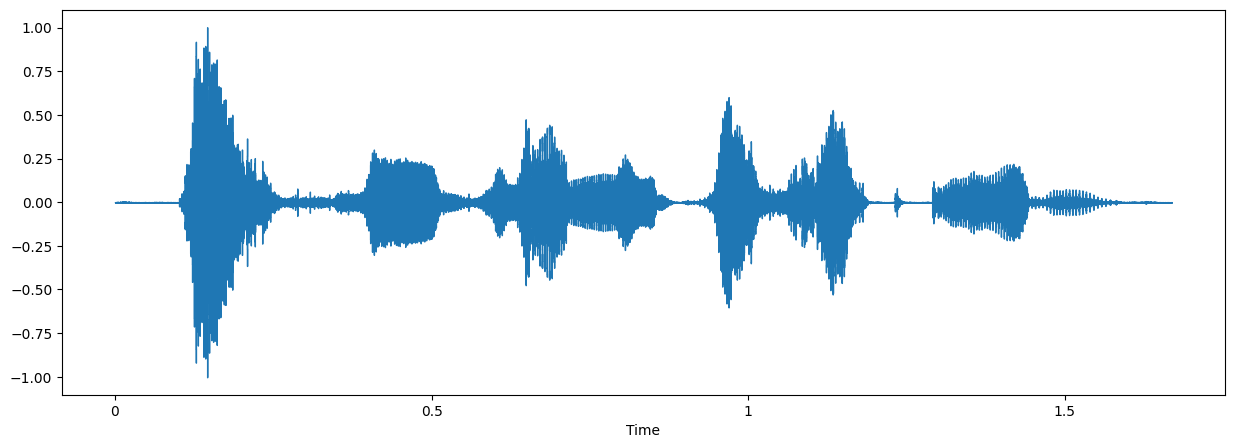

In [8]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

In [10]:
data_path = 'emodb/wav'
dest_path = 'emodb/wav_train_test'

In [11]:
labels_encoded = {'W':0, 'L':1, 'E':2, 'A':3, 'F':4, 'T':5, 'N':6}
gender_encoded = {'03':1 , '10' : 1, '11':1 , '12':1 , '15':1, '08':0, '09':0, '13':0 , '14':0, '16':0}

In [12]:
labels = []
file_paths = []
gender = []

In [13]:
for file_name in os.listdir(data_path):
  if file_name.endswith('.wav'):
    file_paths.append(file_name)
    labels.append(labels_encoded[file_name[5]])

In [14]:
df = pd.DataFrame(
    {
        'file_path':file_paths,
        'label':labels,
    }
)
df

,file_path,label
0,03a01Fa.wav,4
1,03a01Nc.wav,6
2,03a01Wa.wav,0
3,03a02Fc.wav,4
4,03a02Nc.wav,6
...,...,...
530,16b10Lb.wav,1
531,16b10Tb.wav,5
532,16b10Td.wav,5
533,16b10Wa.wav,0


In [15]:
plot_x = np.array(df.label.unique())
plot_x.sort()
plot_x

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [16]:
unique_values = df.label.value_counts(sort = True)
unique_values

0    127
1     81
6     79
4     71
3     69
5     62
2     46
Name: label, dtype: int64

In [17]:
plot_y = []
for x in plot_x:
  plot_y.append(unique_values[x])
plot_y

[127, 81, 46, 69, 71, 62, 79]

In [ ]:
unique_values = pd.DataFrame(unique_values)

In [19]:
df.isnull().sum()

file_path    0
label        0
dtype: int64

In [20]:
data_mfcc = librosa.feature.mfcc(y = data , sr = sampling_rate, n_mfcc = 20)

In [21]:
data.shape

(36802,)

In [22]:
data_mfcc.shape

(20, 72)

In [23]:
data_mfcc

array([[-5.4113873e+02, -5.3545520e+02, -5.6429401e+02, ...,
        -5.1671906e+02, -5.4457074e+02, -5.5832874e+02],
       [ 6.0878986e+01,  6.6498222e+01,  3.6418499e+01, ...,
         8.0052803e+01,  5.6882122e+01,  4.4374359e+01],
       [ 3.6335297e+01,  3.8591103e+01,  2.9815769e+01, ...,
         4.0827362e+01,  4.2071880e+01,  3.8139397e+01],
       ...,
       [ 4.1612477e+00,  5.8324227e+00,  2.8061352e+00, ...,
        -1.0315620e+01, -2.7805433e+00, -4.2048783e+00],
       [-2.9308200e-01,  1.3367271e+00,  2.6115558e+00, ...,
        -1.0182588e+01, -3.1437523e+00, -3.1660812e+00],
       [-4.8473864e+00, -4.0767679e+00,  1.5981030e+00, ...,
        -3.4311895e+00, -5.9004421e+00, -3.5788937e+00]], dtype=float32)

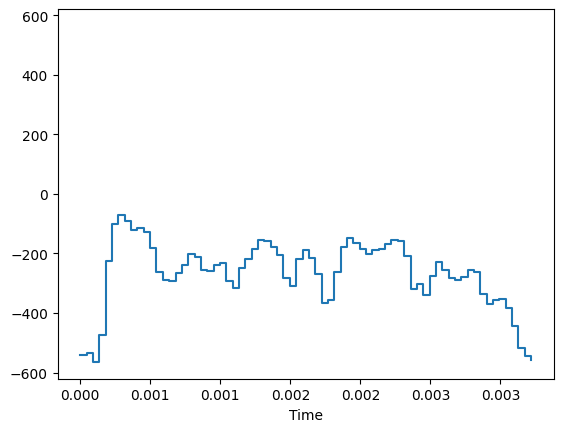

In [24]:
librosa.display.waveshow(data_mfcc, sr=sampling_rate)

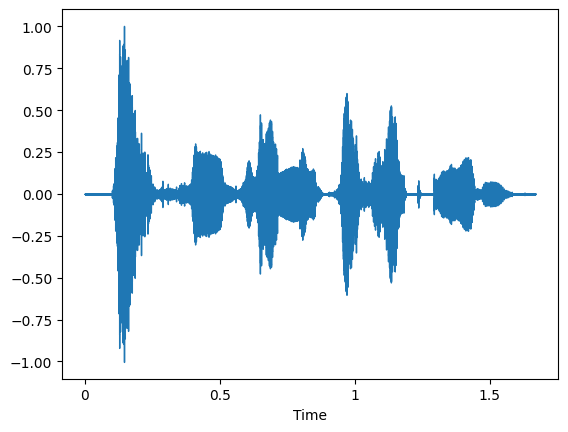

In [25]:
librosa.display.waveshow(data, sr=sampling_rate)

In [26]:
df['file_path']
df_2_audio_vals = []
x = 1
for audio_file in df['file_path']:
  data, sampling_rate = librosa.load(f'emodb/wav/{audio_file}')
  data_mfcc = librosa.feature.mfcc(y = data , sr = sampling_rate, n_mfcc = 20)
  df_2_audio_vals.append(data_mfcc)
  print(f"Iteration {x}")
  x+=1

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74
Iteration 75
Iteration 76
Iteration 77
Iteratio

In [27]:
df_2_audio_vals[0]

array([[-573.01196  , -582.12134  , -586.8176   , ..., -492.71088  ,
        -531.3699   , -549.42737  ],
       [  40.869022 ,   42.113426 ,   34.175797 , ...,   80.3799   ,
          71.04459  ,   57.802822 ],
       [  22.214771 ,   30.598278 ,   32.493942 , ...,   -9.611155 ,
          10.583006 ,   20.991535 ],
       ...,
       [   3.1278315,    2.276405 ,    3.3137722, ...,    5.9192305,
           4.657548 ,    2.0677426],
       [   4.8470707,    2.675071 ,    2.577607 , ...,   13.503    ,
          13.435967 ,    7.1793947],
       [   4.2935753,    2.4341059,    1.7580795, ...,   -3.2146842,
          -3.330796 ,    1.3146564]], dtype=float32)

In [28]:
columns_length = [aud.shape[1] for aud in df_2_audio_vals]
max_col_len = max(columns_length)
max_col_len

387

In [29]:
df_2_audio_vals_padded = df_2_audio_vals.copy()
for ind, arr in enumerate(df_2_audio_vals_padded):
  arr_sh = arr.shape[1]
  zero_cols = max_col_len - arr_sh
  zero_arr = np.zeros((arr.shape[0], zero_cols))
  res_arr = np.hstack((arr, zero_arr))
  df_2_audio_vals_padded[ind] = res_arr

In [30]:
df_2_audio_vals[20].shape

(20, 92)

In [31]:
df_2_audio_vals_padded[20].shape

(20, 387)

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
df_2_audio_vals[0]

array([[-573.01196  , -582.12134  , -586.8176   , ..., -492.71088  ,
        -531.3699   , -549.42737  ],
       [  40.869022 ,   42.113426 ,   34.175797 , ...,   80.3799   ,
          71.04459  ,   57.802822 ],
       [  22.214771 ,   30.598278 ,   32.493942 , ...,   -9.611155 ,
          10.583006 ,   20.991535 ],
       ...,
       [   3.1278315,    2.276405 ,    3.3137722, ...,    5.9192305,
           4.657548 ,    2.0677426],
       [   4.8470707,    2.675071 ,    2.577607 , ...,   13.503    ,
          13.435967 ,    7.1793947],
       [   4.2935753,    2.4341059,    1.7580795, ...,   -3.2146842,
          -3.330796 ,    1.3146564]], dtype=float32)

In [34]:
np.mean(df_2_audio_vals[0])

-9.868072

In [35]:
scaler = StandardScaler()
# df_2['audio'] = df_2['audio'].apply(lambda x : scaler.fit_transform(x))
for ind, aud in enumerate(df_2_audio_vals):
  df_2_audio_vals[ind] = scaler.fit_transform(df_2_audio_vals[ind])
  df_2_audio_vals_padded[ind] = scaler.fit_transform(df_2_audio_vals_padded[ind])
df_2_audio_vals[230].shape

(20, 225)

In [36]:
df_2 = pd.DataFrame(
    {
        'audio': df_2_audio_vals_padded,
        'labels': labels
    }
)

In [37]:
df_2_unpad = pd.DataFrame(
    {
        'audio':df_2_audio_vals,
        'labels':labels
    }
)

In [38]:
df_2

,audio,labels
0,"[[-4.345240606636697, -4.345280245505488, -4.3...",4
1,"[[-4.3273671723845375, -4.297923112827706, -4....",6
2,"[[-4.357944622291275, -4.355985900723285, -4.3...",0
3,"[[-4.3036640193906965, -4.272188294612251, -4....",4
4,"[[-4.351372638345867, -4.343620000765398, -4.3...",6
...,...,...
530,"[[-4.253246113927521, -4.2693504117850125, -4....",1
531,"[[-4.32137243562459, -4.329907616419353, -4.33...",5
532,"[[-4.310066644173442, -4.330933367137214, -4.3...",5
533,"[[-4.3412139053771375, -4.3357660491362955, -4...",0


In [39]:
df_2['audio'][0].shape

(20, 387)

In [40]:
df_2_flattened = df_2.copy()
df_2_flattened['audio'] = df_2_flattened['audio'].apply(lambda x : x.reshape(-1))

In [41]:
df_2['audio'][0]

array([[-4.34524061, -4.34528025, -4.34747162, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.46126633,  0.46104864,  0.40148468, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.31520905,  0.37238714,  0.38862294, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.16576394,  0.15432137,  0.16547186, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.17922508,  0.15739092,  0.15984215, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.17489137,  0.1555356 ,  0.15357493, ...,  0.        ,
         0.        ,  0.        ]])

In [42]:
X = df_2_flattened['audio']
X

0      [-4.345240606636697, -4.345280245505488, -4.34...
1      [-4.3273671723845375, -4.297923112827706, -4.3...
2      [-4.357944622291275, -4.355985900723285, -4.35...
3      [-4.3036640193906965, -4.272188294612251, -4.2...
4      [-4.351372638345867, -4.343620000765398, -4.34...
                             ...                        
530    [-4.253246113927521, -4.2693504117850125, -4.3...
531    [-4.32137243562459, -4.329907616419353, -4.334...
532    [-4.310066644173442, -4.330933367137214, -4.33...
533    [-4.3412139053771375, -4.3357660491362955, -4....
534    [-4.339317445845838, -4.341516229273682, -4.23...
Name: audio, Length: 535, dtype: object

In [43]:
X[100].shape

(7740,)

In [44]:
df_2['audio'][0][0]

array([-4.34524061, -4.34528025, -4.34747162, -4.34862713, -4.12832415,
       -3.44958203, -2.30371533, -1.59507488, -2.06477989, -2.82791621,
       -3.24565281, -3.75888287, -3.9565561 , -4.00332808, -3.20928873,
       -1.80199406, -1.0287318 , -1.1477509 , -2.20792443, -3.77053317,
       -4.29868438, -4.27617214, -4.17269383, -4.15897386, -4.01921061,
       -3.70239728, -3.67666106, -3.94043642, -4.00283266, -3.98774536,
       -3.71177446, -3.55994192, -3.71672674, -3.96277269, -4.07402734,
       -4.20475592, -3.85236633, -3.45667476, -2.98541137, -2.50033813,
       -2.70004905, -3.42482658, -3.87614122, -4.026658  , -3.61206565,
       -3.4429258 , -3.59069724, -3.68338894, -3.7318287 , -3.77608548,
       -3.771266  , -2.78535423, -2.11382962, -2.05591369, -2.47966499,
       -3.14378193, -3.6463544 , -3.87301014, -3.8482288 , -3.79926512,
       -3.6233864 , -3.46345747, -3.38203189, -3.34327241, -3.63399807,
       -4.04529309, -3.69758579, -3.10233814, -2.90946856, -2.88

In [45]:
df_2['audio'][0]

array([[-4.34524061, -4.34528025, -4.34747162, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.46126633,  0.46104864,  0.40148468, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.31520905,  0.37238714,  0.38862294, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.16576394,  0.15432137,  0.16547186, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.17922508,  0.15739092,  0.15984215, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.17489137,  0.1555356 ,  0.15357493, ...,  0.        ,
         0.        ,  0.        ]])

In [46]:
y = df_2['labels']
y

0      4
1      6
2      0
3      4
4      6
      ..
530    1
531    5
532    5
533    0
534    0
Name: labels, Length: 535, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [49]:
import tensorflow as tf
import sklearn
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, LSTM
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import load_model

In [50]:
X_train_arr = X_train.to_numpy()
X_train_res = X_train_arr.flatten()
X_train_tens = tf.stack(X_train_res)

In [51]:
X_test_res = X_test.to_numpy().flatten()
X_test_tens = tf.stack(X_test_res)

In [52]:
X_train_tensor_res = np.reshape(X_train_tens, (X_train_tens.shape[0], 1, X_train_tens.shape[1]))

In [53]:
X_test_tensor_res = np.reshape(X_test_tens, (X_test_tens.shape[0], 1, X_test_tens.shape[1]))

In [54]:
y_train_one_hot = tf.one_hot(y_train, 7)

In [55]:
y_train_one_hot.shape

TensorShape([481, 7])

In [56]:
y_test_one_hot = tf.one_hot(y_test, 7)

In [57]:
X_train_arr.shape

(481,)

In [62]:
model = tf.keras.Sequential()

model.add(Bidirectional(LSTM(units = 512 , return_sequences = True), input_shape = (None,7740),))
model.add(layers.Dropout(0.7))
model.add(layers.Bidirectional(layers.GRU(512, return_sequences = True),))
model.add(layers.Dropout(0.7))
model.add(layers.Bidirectional(layers.LSTM(units = 1024, return_sequences = True)))
model.add(layers.Dropout(0.9))
model.add(layers.Bidirectional(layers.LSTM(units = 512, return_sequences = True)))
model.add(Bidirectional(layers.GRU(512)))
model.add(layers.Dense(7, activation = 'sigmoid'))


In [63]:
model.build((X_train_tens))

In [64]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_3 (Bidirecti  (None, None, 1024)        33804288  
 onal)                                                           
                                                                 
 dropout (Dropout)           (None, None, 1024)        0         
                                                                 
 bidirectional_4 (Bidirecti  (None, None, 1024)        4724736   
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, None, 1024)        0         
                                                                 
 bidirectional_5 (Bidirecti  (None, None, 2048)        16785408  
 onal)                                                           
                                                      

In [65]:
model.compile(
    loss = keras.losses.CategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.0001),
    metrics = ['accuracy', 'FalseNegatives', 'FalsePositives', 'Precision', 'Recall']
)

In [66]:
history = model.fit(X_train_tensor_res, y_train_one_hot,validation_split = 0.1, batch_size = 50, epochs = 80, verbose = 2)

Epoch 1/80


9/9 - 48s - loss: 1.9434 - accuracy: 0.1690 - false_negatives: 191.0000 - false_positives: 1260.0000 - precision: 0.1606 - recall: 0.5579 - val_loss: 1.9451 - val_accuracy: 0.1429 - val_false_negatives: 26.0000 - val_false_positives: 135.0000 - val_precision: 0.1456 - val_recall: 0.4694 - 48s/epoch - 5s/step
Epoch 2/80
9/9 - 13s - loss: 1.9382 - accuracy: 0.2384 - false_negatives: 188.0000 - false_positives: 1150.0000 - precision: 0.1750 - recall: 0.5648 - val_loss: 1.9438 - val_accuracy: 0.1429 - val_false_negatives: 30.0000 - val_false_positives: 100.0000 - val_precision: 0.1597 - val_recall: 0.3878 - 13s/epoch - 1s/step
Epoch 3/80
9/9 - 13s - loss: 1.9320 - accuracy: 0.2407 - false_negatives: 210.0000 - false_positives: 1043.0000 - precision: 0.1755 - recall: 0.5139 - val_loss: 1.9430 - val_accuracy: 0.1429 - val_false_negatives: 30.0000 - val_false_positives: 103.0000 - val_precision: 0.1557 - val_recall: 0.3878 - 13s/epoch - 1s/step
Epoch 4/80
9/9 - 13s - loss: 1.9219

In [67]:
loss = model.evaluate(X_test_tensor_res, y_test_one_hot, verbose = 2)

2/2 - 0s - loss: 1.5070 - accuracy: 0.6667 - false_negatives: 2.0000 - false_positives: 96.0000 - precision: 0.3514 - recall: 0.9630 - 161ms/epoch - 81ms/step


In [68]:
loss

[1.5070182085037231,
 0.6666666865348816,
 2.0,
 96.0,
 0.3513513505458832,
 0.9629629850387573]

In [69]:
model.save("Model_67abcde.h5")

C:\Users\91824\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [70]:
y_pred_probs = model.predict(X_test_tensor_res)

2/2 [==============================] - 4s 60ms/step


In [71]:
y_pred_probs

array([[3.67813955e-05, 9.99765337e-01, 2.28776097e-01, 9.46349919e-01,
        9.69621632e-03, 1.39636332e-02, 9.99885082e-01],
       [9.93393123e-01, 1.66933723e-02, 9.70077753e-01, 7.41730705e-02,
        9.48340118e-01, 2.25723803e-01, 1.57200135e-02],
       [2.36525908e-01, 9.96745646e-01, 9.59648967e-01, 1.28904081e-04,
        4.01429716e-05, 9.99999642e-01, 9.08892695e-03],
       [3.52973421e-03, 9.99992788e-01, 8.47822487e-01, 5.38027938e-03,
        6.38863203e-05, 9.92636681e-01, 8.73200715e-01],
       [9.98123169e-01, 5.85866626e-03, 1.75146073e-01, 4.39445496e-01,
        9.97982323e-01, 8.50251392e-02, 1.61758959e-02],
       [9.99989450e-01, 1.65981043e-03, 1.34520361e-03, 3.59544754e-01,
        9.99880314e-01, 5.06145060e-02, 3.15706641e-03],
       [2.16589317e-01, 9.97432947e-01, 9.71120596e-01, 1.49202679e-04,
        4.28752537e-05, 9.99999285e-01, 1.09971492e-02],
       [2.64220689e-05, 3.84686470e-01, 9.75562783e-04, 9.99996185e-01,
        9.80692625e-01, 5

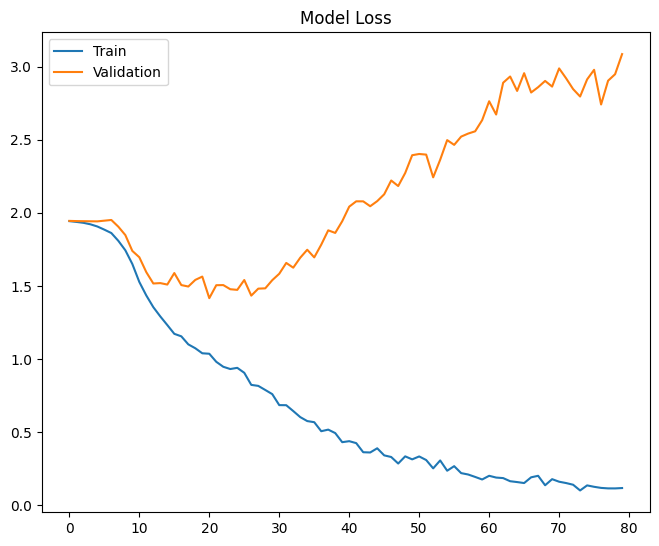

In [75]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

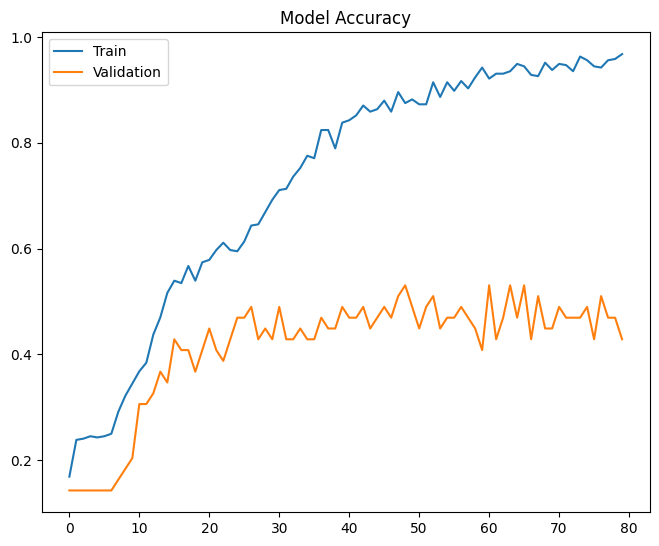

In [76]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

In [77]:
model_json = model.to_json()
with open("model_a.json", "w") as json_file:
    json_file.write(model_json)